***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

Curso basado en el libro Introduction to Machine Learning with Python by Andreas Mueller and Sarah Guido.

***

In [1]:
# Global imports and settings
%matplotlib inline

# Clase 2: Modelos lineales

## Las matemáticas detrás de machine learning
* Para comprender los algoritmos de machine learning, a menudo es útil describirlos matemáticamente.
* Para evitar confusiones, especifiquemos una notación precisa

### Notación básica
* Un _escalar_ es un valor numérico simple, denotado por una letra cursiva: $ x = 3.24 $
* Un _vector_ es un arreglo ordenado en 1D de _n_ escalares, denotado por una letra en negrita: $\mathbf{x}=[3.24, 1.2]$
    * Un vector puede representar un _punto_ en un espacio n-dimensional, dada una _base_.
    * $ x_i $ denota el $i$-ésimo elemento de un vector, por lo tanto $ x_0 = 3.24 $.
* Un _conjunto_ es una colección _no ordenada_ de elementos únicos, denotados por una capital caligráfica: $ \mathcal {S} = \{3.24, 1.2 \} $
* Una _matriz_ es un arreglo 2D de escalares, denotada por negrita mayúscula: $\mathbf{X}=\begin{bmatrix}
3.24 & 1.2 \\
2.24 & 0.2 
\end{bmatrix}$
    * Puede representar un conjunto de puntos en un espacio n-dimensional, dada una _base_.
  * $\textbf{X}_{i}$ denota la $i$-ésima _fila_ de una matriz
  * $\textbf{X}_{i,j}$ denota el _elemento_ en la $i$-ésima fila, $j$-ésima columna, por lo tanto, $\mathbf{X}_{1,0} = 2.24$
* La _base estándar_ para un espacio euclidiano es el conjunto de vectores unitarios
    * Los datos también se pueden representar usando una base no estándar (por ejemplo, polinomios) si son útiles.

* Un _tensor_ es un arreglo de datos _k_-dimensional, denotado por una mayúscula en cursiva: $ T $
    * _k_ también se conoce como el *orden*, *grado*, o *rango*
    * $T_{i,j,k,...}$ denota el elemento o subtensor en la posición correspondiente
    * Un conjunto de imágenes a color se puede representar mediante:
        * Un tensor 4D (sample x height x width x color channel)
        * Un tensor 2D (sample x flattened vector of pixel values)
    
![](https://drive.google.com/uc?id=1Lp_BTYasX0fb_65G9GHWokwxZVej9Had)

### Operaciones básicas
* Las sumas y productos se indican con mayúscula Sigma y mayúscula Pi:
$$\sum_{i=0}^{n} = x_0 + x_1 + ... + x_p \quad \prod_{i=0}^{n} = x_0 \cdot x_1 \cdot ... \cdot x_p$$
* Las operaciones en vectores son *a nivel de elemento*: p.ej. $\mathbf{x}+\mathbf{z} = [x_0+z_0,x_1+z_1, ... , x_p+z_p]$
* Producto punto $\mathbf{w}\mathbf{x} = \mathbf{w} \cdot \mathbf{x} = \sum_{i=0}^{p} w_i \cdot x_i = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p$
* Producto de matriz $\mathbf{W}\mathbf{x} = \begin{bmatrix}
\mathbf{w_0} \cdot \mathbf{x} \\
... \\
\mathbf{w_p} \cdot \mathbf{x} \end{bmatrix}$
* Una función $ f (x) = y $ relaciona un elemento de entrada $ x $ con una salida $ y $
    * Tiene un _mínimo local_ en $x=c$ si $f(x) \geq f(c)$ en el intervalo $(c-\epsilon, c+\epsilon)$
    * Tiene un _mínimo global_ en $x=c$ si $f(x) \geq f(c)$ para cualquier valor de $x$
* Una función vectorial consume una entrada y produce un vector: $\mathbf{f}(\mathbf{x}) = \mathbf{y}$
* $\underset{x\in X}{\operatorname{max}}f(x)$ devuelve el valor más alto f (x) para cualquier x
* $\underset{c\in C}{\operatorname{argmax}}f(x)$ devuelve el elemento c que maximiza f (c)

### Gradientes
* Una _derivada_ $ f '$ de una función $ f $ describe qué tan rápido $ f $ crece o decrece
* El proceso de encontrar una derivada se llama diferenciación
    * Derivadas para funciones básicas son conocidas
    * Para funciones no básicas usamos la *regla de la cadena*: $F(x) = f(g(x)) \rightarrow F'(x)=f'(g(x))g'(x)$
* Una función es *diferenciable* si tiene una derivada en cualquier punto de su dominio
    * Es *continuamente diferenciable* si $ f '$ es en sí misma una función
    * Es *suave* si $f', f'', f''', ...$ existen todas
* Un *gradiente* $\nabla f$ es la derivada de una función en múltiples dimensiones
    * Es un vector de *derivadas parciales*: $\nabla f = \left[ \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1},... \right]$
    * E.j. $f=2x_0+3x_1^{2}-\sin(x_2) \rightarrow \nabla f= [2, 6x_1, -cos(x_2)]$

### Probabilidades
* Una variable aleatoria $ X $ puede ser continua o discreta
* Una distribución de probabilidad de una variable discreta es la lista de probabilidades para cada valor posible
    * También llamada *función de masa de probabilidad* (*pmf*)
    * El *valor esperado* o la *esperanza* (o la *media*) $\mathbb{E}[X] = \mu_X = \sum_{i=1}^k[x_i \cdot Pr(X=x_i)]$
    * La desviación estándar $\sigma = \sqrt{\mathbb{E}[(X-\mu)^2]}$ y la varianza $var(X) = \sigma^2$
* Una distribución de probabilidad $f_X$ de una variable continua $X$ es descrita por una *función de densidad de probabilidad* (*pdf*)
    * El *valor esperado* viene dado por $\mathbb{E}[X] = \int_{\mathbb{R}} x f_X(x) dx$
   
![](https://drive.google.com/uc?id=1Crv-fhyLOtioqYHUgHoc6KekFcGtZjsX)

# Modelos lineales
Los modelos lineales hacen una predicción usando una función lineal de las características de entrada. Puede ser muy poderoso para conjuntos de datos con muchas características. 

Si se tiene más características (atributos) que puntos de datos de entrenamiento, cualquier objetivo $y$ puede modelarse perfectamente (en el conjunto de entrenamiento) como una función lineal.

## Modelos lineales para regresión
Fórmula de predicción para las características de entrada $x$. $ w_i $ y $b$ son los *parámetros del modelo* que deben aprenderse. 

$$\hat{y} = \mathbf{w}\mathbf{x} + b = \sum_{i=0}^{p} w_i \cdot x_i + b = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + w_p \cdot x_p + b $$

Hay muchos algoritmos diferentes, que difieren en cómo se aprenden $w$ y $b$ de los datos de entrenamiento.

In [3]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 6.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=653e5ffe3fb72d9a209507076677721a5e0fe53f7b92dd9a7b355386433e72af
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [4]:
import mglearn

w[0]: 0.393906  b: -0.031804


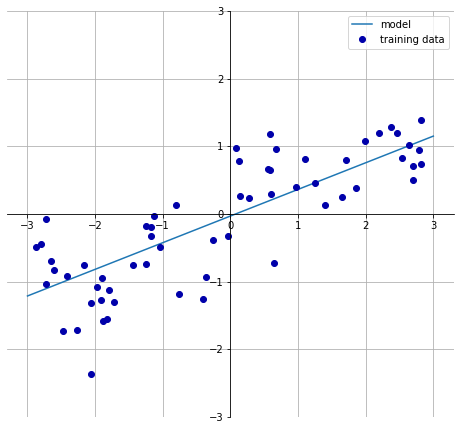

In [5]:
mglearn.plots.plot_linear_regression_wave()

### Regresión lineal también conocido como mínimos cuadrados ordinarios
* Encuentra los parámetros w y b que minimizan el error cuadrático medio entre las predicciones (rojo) y los verdaderos objetivos de regresión (azul), $y$, en el conjunto de entrenamiento. 
  * MSE: Suma del error cuadrático (residuos) entre las predicciones $\hat{y_i}$ y los valores verdaderos $y_i$.
$$\mathcal{L}_{MSE} = \sum_{n=0}^{N} (y_n-\hat{y_n})^2 = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2$$ 


![](https://drive.google.com/uc?id=1maIxRviUsyZ2syu7vZz7S1PUL68X-4MF)

#### Resolviendo mínimos cuadrados ordinarios
* Problema de optimización convexo con una solución única de forma cerrada (si se tiene más puntos de datos que los parámetros del modelo w)
* No tiene hiperparámetros, por lo tanto, la complejidad del modelo no se puede controlar.

La regresión lineal se puede encontrar en `sklearn.linear_model`. Lo evaluaremos en el conjunto de datos de Boston Housing.

``` python
lr = LinearRegression().fit(X_train, y_train)
```

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [7]:
X.shape

(506, 104)

In [ ]:
print("Weights (coefficients): {}".format(lr.coef_[0:40]))
print("Bias (intercept): {}".format(lr.intercept_))

Weights (coefficients): [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00]
Bias (intercept): 30.93456367364429


In [ ]:
print("Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))

Training set score (R^2): 0.95
Test set score (R^2): 0.61


### Regresión ridge
* Misma fórmula que la regresión lineal
* Agrega un término de penalización a la suma de mínimos cuadrados:

$$\mathcal{L}_{Ridge} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} w_i^2$$ 

* Requiere que los coeficientes (w) estén cerca de cero.
    * Cada característica debería tener el menor efecto posible en el resultado 
* Regularización: restringir explícitamente un modelo para evitar el sobreajuste. 
* Tipo de regularización L2: prefiere muchos pesos pequeños
    * La regularización L1 prefiere *sparsity*: muchos pesos son 0, otros grandes

`Ridge` también se puede encontrar en `sklearn.linear_model`.  
`ridge = Ridge().fit(X_train, y_train)`

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


El puntaje del conjunto de prueba es más alto y el puntaje del conjunto de entrenamiento más bajo: ¡menos sobreajuste!

La fuerza de la regularización se puede controlar con el parámetro `alpha`. El valor predeterminado es 1.0.
* Un aumento en alpha obliga a los coeficientes a moverse más hacia cero (más regularización)
* La disminución de alpha permite que los coeficientes sean menos restringidos (menos regularización)

Podemos graficar los valores de los pesos para diferentes niveles de regularización. Podemos mover el control deslizante para aumentar / disminuir la regularización. Al aumentar la regularización, disminuye los valores de los coeficientes, pero nunca a 0.

In [ ]:
import matplotlib.pyplot as plt
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X, y, random_state=0)

@interact
def plot_ridge(alpha=(0,10.0,0.05)):
    r = Ridge(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25)
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, step=0.05), Output()), _dom_classe…

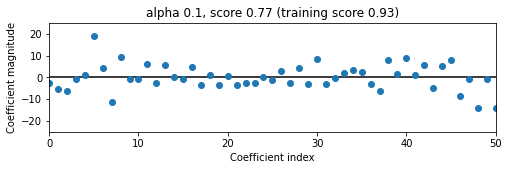

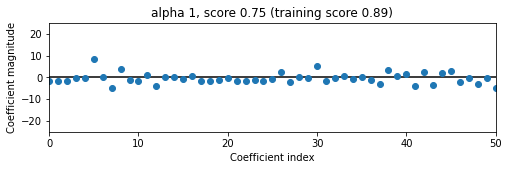

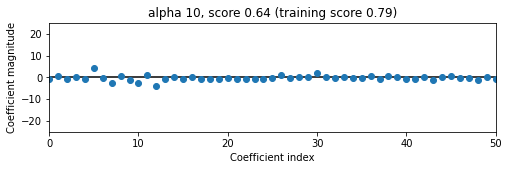

In [ ]:
for alpha in [0.1, 1, 10]:
    plot_ridge(alpha)

Otra forma de comprender la influencia de la regularización es fijar un valor de alpha pero variar la cantidad de datos de entrenamiento disponibles. Con suficientes datos de entrenamiento, la regularización se vuelve menos importante: ridge y la regresión lineal tendrán el mismo rendimiento.

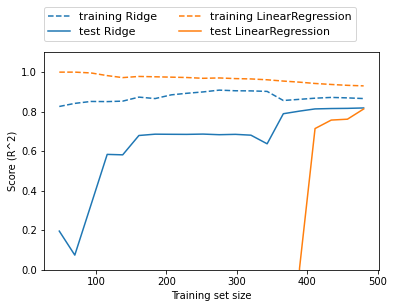

In [ ]:
mglearn.plots.plot_ridge_n_samples()

### Lasso (Least Absolute Shrinkage and Selection Operator)
* Otra forma de regularización.
* Agrega un término de penalización a la suma de mínimos cuadrados:
$$\mathcal{L}_{Lasso} = \sum_{n=0}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + b))^2 + \alpha \sum_{i=0}^{p} |w_i|$$ 
* Prefiere que los coeficientes sean exactamente cero (regularización L1).
* El modelo ignora por completo algunas características: selección automática de características.
* Mismo parámetro `alpha` para controlar la fuerza de la regularización. 
* Convexo, pero ya no estrictamente convexo (y NO diferenciable). Los pesos se pueden optimizar utilizando (por ejemplo) [*coordinate descent*](https://en.wikipedia.org/wiki/Coordinate_descent)
* Nuevo parámetro `max_iter`: el número máximo de iteraciones de descenso de coordenadas
    * Debería ser alto para valores pequeños de`alpha`

### Gradiente Descendente
* Comience con un conjunto aleatorio de valores de p pesos $\mathbf{w}^0$
* Calcule la derivada de la función objetivo $\mathcal{L}$ (e.g. $\mathcal{L_{Ridge}}$) y úsalo para encontrar la pendiente (en p dimensiones)
* Actualizar todos los pesos ligeramente (tamaño de paso $\gamma$) en la dirección de la cuesta abajo. Para el paso s:
$$\mathbf{w}^{s+1} = \mathbf{w}^s-\gamma\nabla \mathcal{L}(\mathbf{w}^s)$$

* Repetir para `max_iter` iteraciones
* Visualización en 1 dimensión (para 1 peso):

![](https://drive.google.com/uc?id=1su1UKtPvKW-desuOK7I6v9ejtGVRoXw0)

### Gradiente Descendente
En dos dimensiones:
![](https://drive.google.com/uc?id=1GYKu_UcUY6rcQJv6FWYh2hvWdDKXBZ99)

### Gradiente Descendente
* Intuición: caminar cuesta abajo usando solo la pendiente que se "siente" cerca

![](https://drive.google.com/uc?id=1bQx5DnW9KrHg3Dfe3TDe9EQLTG13_EGz)

### Coordinate descent
- Variación del gradiente descendente, también aplicable para funciones de pérdida no diferenciables
- Iteraciones más rápidas, puede converger más lentamente
- En cada iteración, optimiza una sola coordenada $w_i$, usando una regla de selección de coordenadas (e.j. *round robin*)

![](https://drive.google.com/uc?id=1kOvvy3JbPZ-RcPLviuh6bJ-MAdti6IbV)

- Si $\mathcal{L}$ es diferenciable, la regla de actualización se basa en la derivada parcial: $w_i^{s+1} = w_i^{s} − \gamma \frac{\partial \mathcal{L}}{\partial w_i}$
- Si $\mathcal{L}$ no es diferenciable pero convexo, se puede calcular el [_subgradient_](https://www.cs.cmu.edu/~ggordon/10725-F12/slides/06-sg-method.pdf). 
- Para Lasso, la [resulting update rule](https://xavierbourretsicotte.github.io/lasso_derivation.html) incluye el *soft thresholding operator S*: $w_i^{s+1} \cong S(f(w_i^{s}),\alpha)$
    - _S_ fija $w_i$'s en 0 cuando son lo suficientemente pequeños ('suficientemente' se define por $\alpha$)


Podemos analizar nuevamente lo que sucede con los pesos. El aumento de la regularización bajo L1 conduce a que muchos coeficientes se conviertan exactamente en 0.

In [ ]:
from sklearn.linear_model import Lasso

@interact
def plot_lasso(alpha=(0,0.5,0.005)):
    r = Lasso(alpha=alpha).fit(X_B_train, y_B_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_, 'o')
    ax.set_title("alpha {}, score {:.2f} (training score {:.2f})".format(alpha, r.score(X_B_test, y_B_test), r.score(X_B_train, y_B_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-25, 25);
    ax.set_xlim(0, 50);

interactive(children=(FloatSlider(value=0.25, description='alpha', max=0.5, step=0.005), Output()), _dom_class…

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932.464303442631, tolerance: 3.233182126649076
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.863561656189, tolerance: 3.233182126649076
  positive)


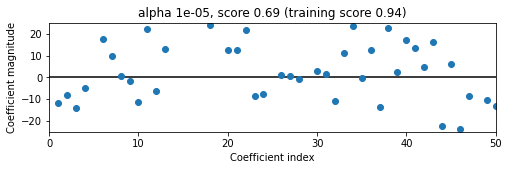

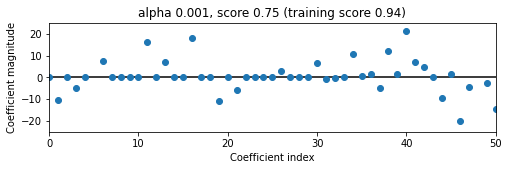

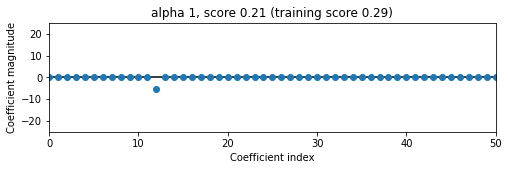

In [ ]:
for alpha in [0.00001, 0.001, 1]:
    plot_lasso(alpha)

## Interpretación de la pérdida L1 y L2
- Las elipses rojas son los contornos de la función de error de mínimos cuadrados
- En calipso están las restricciones impuestas por la pérdida L1 (izquierda) y L2 (derecha)
- Para L1, la probabilidad de alcanzar el objetivo con las esquinas es mayor
    - Los pesos de otros coeficientes son 0, por lo tanto, representaciones *sparse*
- Para L2, podría intersectar en cualquier punto, por lo tanto, pesos distintos de cero
- Del libro [*Elements of Statistical Learning*](https://link.springer.com/book/10.1007%2F978-0-387-84858-7):

L1 and L2 loss
![](https://drive.google.com/uc?id=1lSRxkXQknsQYfJs02GFS-onPbmxP9w7X)

#### Modelos lineales para clasificación
Busca encontrar un (hiper) plano que separe los ejemplos de cada clase. 
Para la clasificación binaria (2 clases), nuestro objetivo es ajustar la siguiente función: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
Cuando $\hat{y}<0$, predecir clase -1, de lo contrario predecir clase +1

Existen muchos algoritmos para aprender modelos de clasificación lineal, que difieren en:

* Función de pérdida: evalúa qué tan bien el modelo lineal se ajusta a los datos de entrenamiento
* Técnicas de regularización

Técnicas más comunes:

* Regresión logística: 
    * `sklearn.linear_model.LogisticRegression`
* Support Vector Machine lineal: 
    * `sklearn.svm.LinearSVC`


##### Regresión logística
El modelo logístico utiliza la función _logistic_ (o *sigmoid*) para estimar la probabilidad de que una muestra dada pertenezca a la clase 1:
$$ z = f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p $$
$$ \hat{y} = Pr[1|x_1,...,x_k] = g(z) = \frac{1}{1+e^{-z}} $$
![LogisticRegression image](https://drive.google.com/uc?id=11pQL6mubeiq51_aoXWWVtauyvNmhsCnr)

[Source](https://florianhartl.com/logistic-regression-geometric-intuition.html)

Con data 2-dimensional: 
![LogisticRegression image](https://drive.google.com/uc?id=1zTHuUtnJf-S_h-8in33B65gOwHpCd_GK)

* La función logística se elige porque asigna valores (-Inf, Inf) a una probabilidad [0,1]
* Agregamos una nueva dimensión para la variable dependiente $\text {y}$, y ajustamos la función logística g (z) para que separe las muestras lo mejor posible. Los puntos positivos (azules) se asignan a 1 y los puntos negativos (rojos) a 0.
* Después del ajuste (fitting), la función logística proporciona la probabilidad de que un nuevo punto sea positivo. Si necesitamos una predicción binaria, podemos establecer un umbral en 0.5.
* Hay diferentes maneras de encontrar los parámetros óptimos w que se ajusten mejor a los datos de entrenamiento

###### Fitting (solving): cross-entropy
* Definimos la diferencia (error) entre las probabilidades reales (frecuencias) $p_i$ y las probabilidades predichas $q_i$ como la entropía cruzada $H(p, q)$:
$$ H(p,q) = - \sum_{i} p_i log(q_i) $$
* Nota: en lugar de minimizar la entropía cruzada $H(p,q)$, se puede maximizar el *logaritmo de la verosimilitud* $-H (p,q)$ y, por lo tanto, esto también se denomina estimación de *máxima verosimilitud*
* En clasificación binaria, $i=0,1$ y $p_1=y$, $p_0=1-y$, $q_1=\hat{y}$, $q_0=1-\hat{y}$
* Y por lo tanto:
$$ H(p,q) = - y log(\hat{y}) - (1-y) log(1-\hat{y})$$

###### Fitting (solving): cross-entropy loss
* Función de pérdida: el promedio de todas las entropías cruzadas en la muestra (de $ N $ puntos de datos):
$$\mathcal{L_{log}}(\mathbf{w}) = \sum_{n=1}^{N} H(p_n,q_n) = \sum_{n=1}^{N} \big[ - y_n log(\hat{y_n}) - (1-y_n) log(1-\hat{y_n}) \big]$$
con $$\hat{y_n} = \frac{1}{1+e^{-\mathbf{w} \cdot \mathbf{x}}}$$
* Esto se llama *logistic loss*, *log loss* o *cross-entropy loss*
* Podemos (y deberíamos siempre) agregar un término de regularización, ya sea L1 o L2, por ejemplo, para L2:
$$\mathcal{L_{log}}'(\mathbf{w}) = \mathcal{L_{log}}(\mathbf{w}) + \alpha \sum_{i} w_i^2 $$
    - Nota: sklearn usa $C$ en vez de $\alpha$, y es el inverso (valores más pequeños, más regularización)

###### Fitting (solving): métodos de optimización
* Hay diferentes formas de optimizar la cross-entropy loss.
* *Gradient descent*
    - La función logística es diferenciable, por lo que podemos usar el descenso del gradiente (estocástico), SGD.
    - Stochastic Average Gradient descent (SAG): solo actualiza el gradiente en una dirección en cada paso
* Coordinate descent (por defecto, llamado `liblinear` in sklearn)
    - Más rápido, puede converger más lentamente, puede atascarse más fácilmente en mínimos locales
* Newton-Rhapson (o Newton Conjugate Gradient):
    - Encuentra optima calculando segundas derivadas (más caro)
    - Funciona bien si el espacio de la solución es (casi) convexo
    - También conocido como _iterative re-weighted least squares_
* Métodos Quasi-Newton
    - Aproximado, más rápido de calcular
    - Ejemplo: Limited-memory Broyden–Fletcher–Goldfarb–Shanno (`lbfgs`)

##### Linear Support Vector Machine (intuición)
Encuentra hiperplanos (líneas segmentadas) maximizando el _margen_ entre las clases  

![](https://drive.google.com/uc?id=10XSPPHfLt7zexE8dPxMnq4HJs1qcx_qu)

###### Optimización y predicción
* La predicción es idéntica a (weighted) kNN:
    * Los puntos más cercanos al vector de soporte rojo se clasifican como rojo, otros azules
    * Un vector de soporte también puede tener un peso (lo veremos más adelante)
* La función objetivo penaliza cada punto que predice que está en el lado `incorrecto` de su hiperplano
    * Esto se llama _hinge loss_
* Esto da como resultado un problema de optimización convexo resuelto utilizando el método _Multiplicadores de Langrange_
    * También se puede resolver usando gradient descent
* Todo esto se discutirá más adelante

Comparación

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


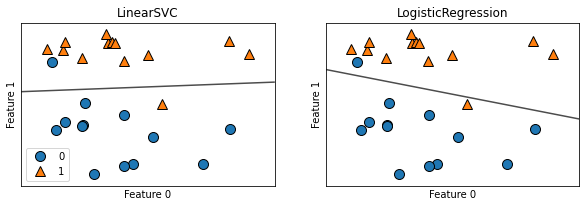

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

Ambos métodos se pueden regularizar:
* Regularización L2 por defecto, L1 también es posible
* Parámetro _C_: inverso de la fuerza de regularización
    * _C_ más alto: menos regularización
    * penalización por clasificar erróneamente los puntos manteniendo $w_i$ cerca de 0

Altos valores de _C_ (menos regularización): Menos clasificaciones erróneas pero márgenes más pequeños.

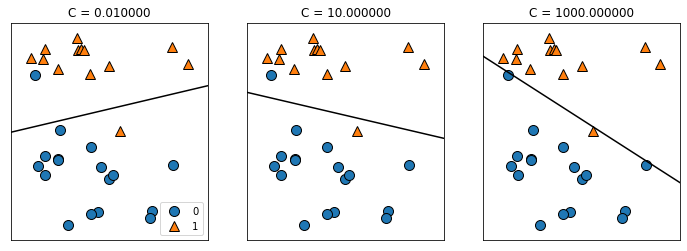

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

Selección de modelo: regresión logística 
`logreg = LogisticRegression(C=1).fit(X_train, y_train)`

Ajuste el control deslizante para ver el efecto de la regularización C y  L2

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

@interact
def plot_logreg(C=(0.01,100.0,0.1), penalty=['l2']):
    r = LogisticRegression(C=C, penalty=penalty).fit(X_C_train, y_C_train)
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(r.coef_.T, 'o')
    ax.set_title("C {}, score {:.2f} (training score {:.2f})".format(C, r.score(X_C_test, y_C_test), r.score(X_C_train, y_C_train)))
    ax.set_xlabel("Coefficient index")
    ax.set_ylabel("Coefficient magnitude")
    ax.hlines(0, 0, len(r.coef_))
    ax.set_ylim(-15, 15)
    ax.set_xlim(0, 30);

interactive(children=(FloatSlider(value=49.910000000000004, description='C', min=0.01), Dropdown(description='…

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


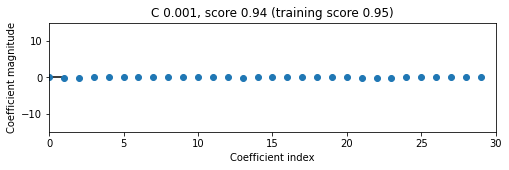

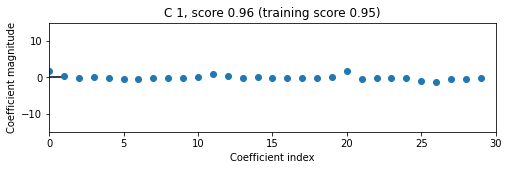

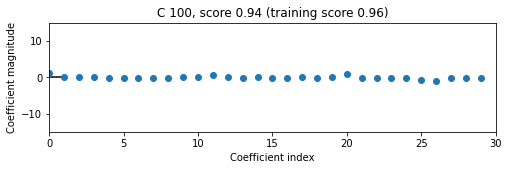

In [ ]:
for C in [0.001, 1, 100]:
    plot_logreg(C, 'l2')

## Estimaciones de incertidumbre de los clasificadores
* Los clasificadores a menudo pueden proporcionar estimaciones de incertidumbre de las predicciones. 
* Recordar que los modelos lineales en realidad devuelven un valor numérico.
  - Cuando $\hat{y}<0$, predecir clase -1, de lo contrario predecir clase +1
  $$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b $$  
* En la práctica, a menudo es de insterés saber qué tan seguro es un clasificador sobre cada predicción de clase (por ejemplo, tratamientos contra el cáncer).


Scikit-learn ofrece 2 funciones. A menudo, ambas están disponibles para todos los modelos de aprendizaje, pero no siempre.

- decision_function: devuelve el valor de coma flotante para cada muestra
- predict_proba: devuelve la probabilidad para cada clase

### La función de decisión
En el caso de clasificación binaria, el valor de retorno de decision_function tiene forma (n_samples,) y devuelve un número de coma flotante para cada muestra. Este valor codifica con qué fuerza el modelo cree que un punto de datos pertenece a la clase "positiva".

- Los valores positivos indican una preferencia por la clase "positiva"
- Los valores negativos indican una preferencia por la clase "negativa" (la otra clase)

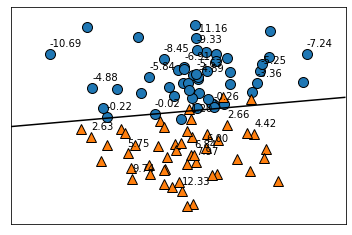

In [ ]:
import numpy as np

# create and split a synthetic dataset
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=2.5, random_state=8)

# we rename the classes "blue" and "red"
y_named = np.array(["blue", "red"])[y]

# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train_named)

# get the decision function
dec = lr.decision_function(X_test)

mglearn.plots.plot_2d_separator(lr, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);

for i, v in enumerate(dec):
    plt.annotate("{:.2f}".format(v), (X_test[i,0],X_test[i,1]),
                 textcoords="offset points", xytext=(0,7))

* El rango de decision_function puede ser arbitrario y depende de los datos y los parámetros del modelo. Esto hace que a veces sea difícil de interpretar.
* Podemos visualizar decision_function de la siguiente manera, con la frontera de decisión real a la izquierda y los valores de las fronteras de decisión codificados por colores a la derecha.
* Observe cómo se etiquetan los ejemplos de prueba según la función de decisión (decision_function).

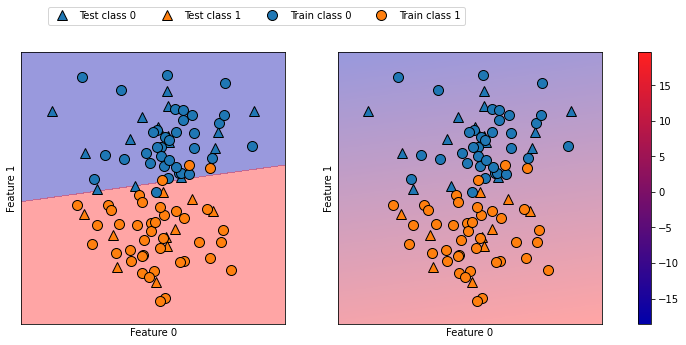

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(lr, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(lr, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));  

### Prediciendo probabilidades
La salida de predict_proba es una *probabilidad* para cada clase, con una columna por clase. Suman hasta 1.

In [ ]:
print("Shape of probabilities: {}".format(lr.predict_proba(X_test).shape))
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
      lr.predict_proba(X_test[:6])))

Shape of probabilities: (25, 2)
Predicted probabilities:
[[2.31558887e-01 7.68441113e-01]
 [2.47716765e-03 9.97522832e-01]
 [5.89215531e-05 9.99941078e-01]
 [3.17309734e-03 9.96826903e-01]
 [1.06840318e-03 9.98931597e-01]
 [9.99785863e-01 2.14137228e-04]]


Podemos visualizarlos de nuevo. Tener en cuenta que el gradiente se ve diferente ahora.

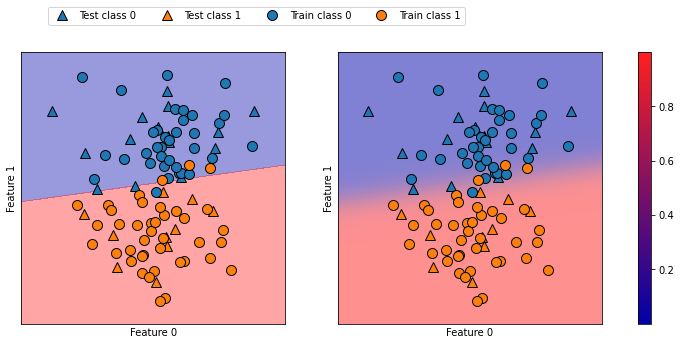

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    lr, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    lr, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

### Interpretación de las probabilidades

- Se predice la clase con la mayor probabilidad.
- Qué tan bien la incertidumbre realmente refleja la incertidumbre en los datos depende del modelo y los parámetros. 
    - Un modelo sobreajustado tiende a hacer predicciones más ciertas, incluso si pudieran estar equivocadas. 
    - Un modelo con menos complejidad generalmente tiene más incertidumbre en sus predicciones. 
- Un modelo se llama *calibrado* si la incertidumbre reportada realmente coincide con lo correcta que es
    — Una predicción hecha con un 70% de certeza sería correcta el 70% del tiempo.
    - LogisticRegression devuelve predicciones bien calibradas por defecto, ya que optimiza directamente el log-loss.
    - Linear SVM  no está bien calibrado. Son *imparciales* (*biased*) hacia puntos cercanos a la frontera de decisión.
- [Técnicas de calibración](http://scikit-learn.org/stable/modules/calibration.html) puede calibrar modelos en postprocesamiento.

Comparación entre logistic regression y linear SVM

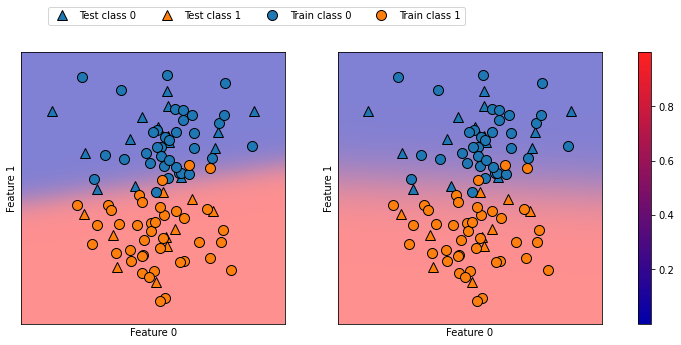

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",C=0.1,probability=True).fit(X_train, y_train_named)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

lr_image = mglearn.tools.plot_2d_scores(
    lr, X, ax=axes[0], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
svc_image = mglearn.tools.plot_2d_scores(
    svc, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(lr_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1));

### Modelos lineales para clasificación multiclase
Técnica común: enfoque uno-vs.-el resto:

* Se aprende un modelo binario para cada clase frente a todas las demás clases.
* Crea tantos modelos binarios como clases.
* Todos los clasificadores binarios hacen una predicción, gana el que tenga la puntuación más alta (> 0)

Construir modelos lineales binarios:

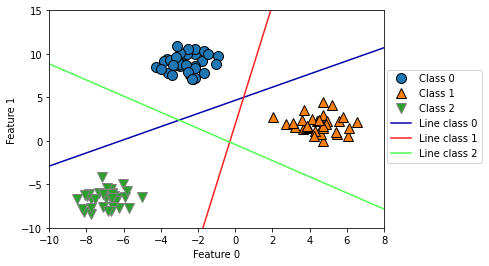

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3));

Predicciones reales (fronteras de decisión):

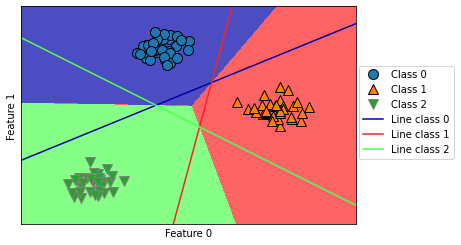

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Incertidumbre en la clasificación de clases múltiples

- `decision_function` y `predict_proba` también funcionan en el entorno multiclase
- siempre tiene forma (n_samples, n_classes)
- Ejemplo en el conjunto de datos de Iris, que tiene 3 clases:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

lr2 = LogisticRegression()
lr2 = lr2.fit(X_train, y_train)

print("Decision function:\n{}".format(lr2.decision_function(X_test)[:6, :]))
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(lr2.predict_proba(X_test)[:6]))

Decision function:
[[ -3.03521065   2.29429392   0.74091673]
 [  5.91897417   3.09098022  -9.00995438]
 [-10.0521944    1.87445887   8.17773553]
 [ -2.73297007   2.03628833   0.69668174]
 [ -3.73746401   2.47551263   1.26195137]
 [  6.03569249   3.03468215  -9.07037465]]
Predicted probabilities:
[[3.98434293e-03 8.22112287e-01 1.73903370e-01]
 [9.44169659e-01 5.58300314e-02 3.10097846e-07]
 [1.20794694e-08 1.82695377e-03 9.98173034e-01]
 [6.68012853e-03 7.87131735e-01 2.06188136e-01]
 [1.54199305e-03 7.69739699e-01 2.28718308e-01]
 [9.52619500e-01 4.73802377e-02 2.62082405e-07]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Resumen de los algoritmos vistos hasta ahora

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Least squares    | Linear function | MSE | Convex optimization (CFS) | None |
| Ridge regression | Linear function | MSE + L2 | Convex optimization (CFS) | L2 loss (alpha)  |
| Lasso regression | Linear function | MSE + L1 | Coordinate descent   | L1 loss (alpha)  |
| Logistic regression | Linear function | Log Loss | Gradient/coordinate descent  | L1 or L2 (C) |
| Linear SVM | Weighted data points | Hinge loss | Constrained optimization  | L1 or L2 (C) |
| kNN | All data points | N/A | N/A  | n_neighbors |

* CFS: Solución de forma cerrada (Closed-form solution)

### Modelos lineales: fortalezas, debilidades y parámetros.
Parámetros de regularización:

* Regresión: alpha (valores más altos, modelos más simples)
    * Ridge (L2), Lasso (L1), LinearRegression (No tiene)
* Clasificación: C (valores más pequeños, modelos más simples)
    * LogisticRegression o SVC (ambos tienen la opción L1/L2)

L1 vs L2:

* L2 es el predeterminado (default)
* Use L1 si asume que pocas características son importantes
    * O, si la interpretabilidad del modelo es importante

Otras opciones:

* ElasticNet regression: permite la compensación (trade-off) L1 vs L2
* SGDClassifier/SGDRegressor: optimiza $w_i$, $b$ con descenso de gradiente estocástico SGD (más escalable)

Considerar modelos lineales cuando:

* la cantidad de características es grande en comparación con la cantidad de muestras
    * otros algoritmos funcionan mejor en espacios de baja dimensión 
* conjuntos de datos muy grandes (rápidos para entrenar y predecir)
    * otros algoritmos se vuelven (demasiado) lentos

## Resumen

- Modelos lineales
    - Recomendable como primer algoritmo para probar, bueno para conjuntos de datos muy grandes, bueno para datos de muy alta dimensión.
- La regularización es importante. Elija entre Ridge (L2) o Lasso (L1)
- Cada algoritmo tiene su propia función objetivo, y cada función se puede optimizar mediante ciertas técnicas.
- Regresión:
    - Ridge: L2 loss + least squares
    - Lasso: L1 loss + gradient descent
- Clasificación:
    - Logistic regression: Cross-entropy + gradient descent (u otros)
    - SVM: Hinge loss + Langrange multipliers
- Los clasificadores devuelven una estimación de certeza. La predicción real se puede *calibrar* hacia un objetivo específico. 
- La clasificación de varias clases se puede hacer usando un enfoque de uno contra todos